2024-09-08 16:00:20.512144: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 16:00:20.576362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-08 16:00:21.591114: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[  -356   -430   -298   -372   -375   -236   -247 -31638   -138   -237
   -128   -209   -142 -31565 -31632 -31618   -130    -21    -13     73
 -31366    -26    127    154    131 -31356     51     64    118    173
 -31350    302 -31228    304    227    270    248 -31091    419    329]


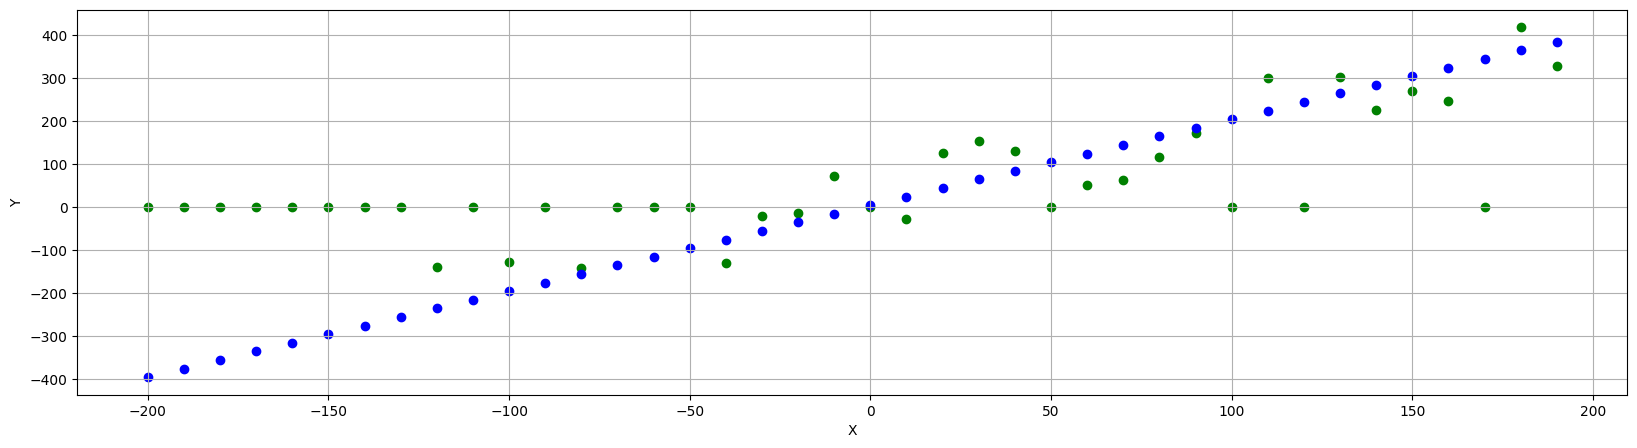

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

rng = np.random.default_rng(12345)
step=10
low = -200
high = 200
size = int((high-low)/step)
off = rng.integers(low=-100, high=100, size=size)

X_train = np.arange(low,high,step)
y_train = X_train * 2 + 5
y_train_lin = y_train

y_train = y_train + off
  
    
def plot_data(x1,y1,x2=[],y2=[],x3=[],y3=[]):
  plt.figure(figsize=(20,5))
  plt.scatter(x1,y1,color='green')
  if (len(x2) != 0):
      plt.scatter(x2,y2,color='blue')
  if (len(x3) != 0):
      plt.scatter(x3,y3,color='red')
        
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.grid(True)

#import random
#rogue = np.arange(0,0,size)
#for i in range(1,10):
#    elem = random.randint(0,size-1)
#    off2 = random.randint(-31500,-31400)
#    y_train[elem] = y_train[elem]+off2

#x = lambda x : x if x > -200 else 0
#normalize = np.vectorize(x)
#y_train=normalize(y_train)

plot_data(X_train,y_train,X_train,y_train_lin)


In [2]:
model = Sequential()
 
# Define the model consisting of a single neuron.
#model.add(Dense(units=1, input_shape=(1,)))
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',metrics=['MeanAbsoluteError'])

Done


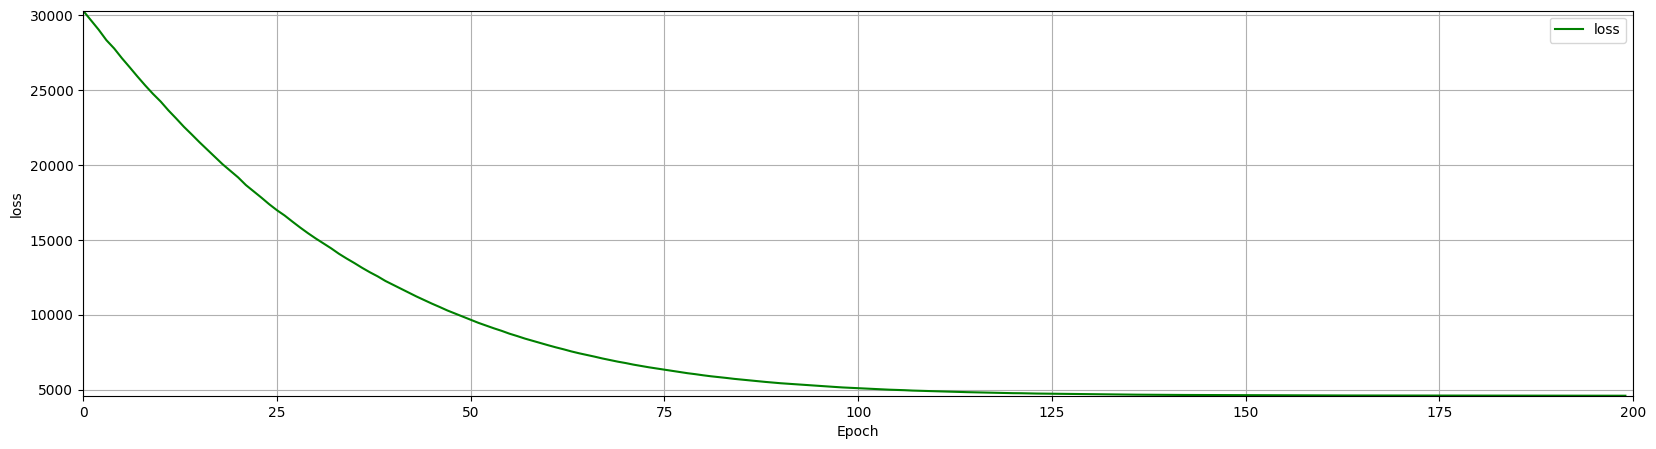

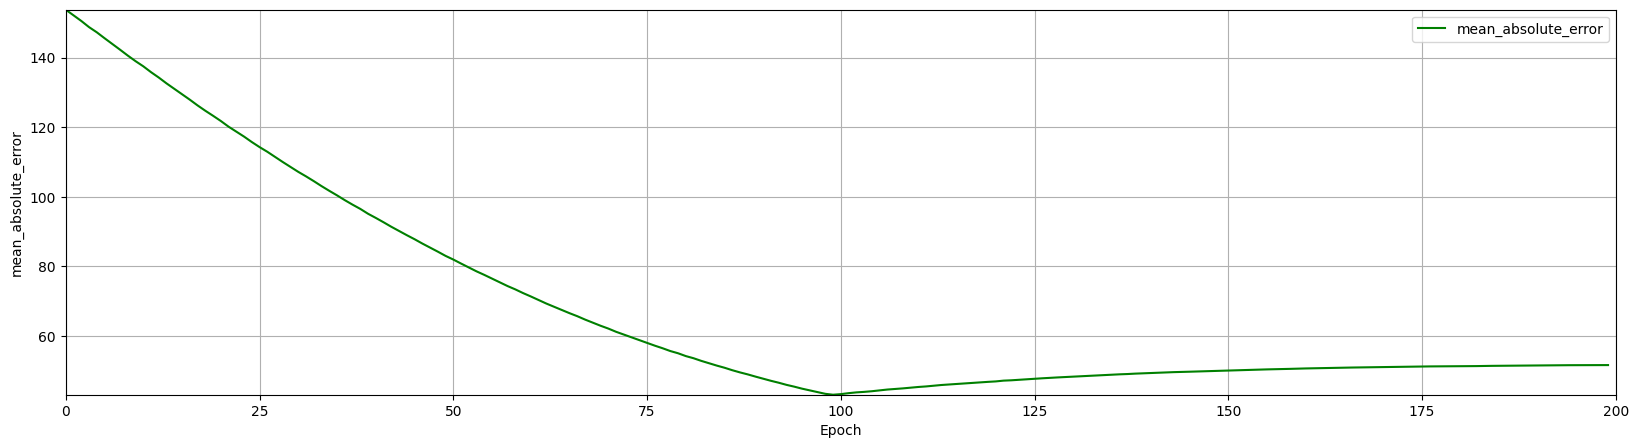

In [4]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=16, 
                    epochs=200, 
                    validation_split=0.3,
                    verbose=0)

print("Done")

def plot_loss(history,data_name='mean_absolute_error'):
    plt.figure(figsize=(20,5))
    plt.plot(history.history[data_name], 'g',label=data_name)
    plt.xlim([0, 200])
    plt.ylim([np.min(history.history[data_name]), np.max(history.history[data_name])])
    plt.xlabel('Epoch')
    plt.ylabel(data_name)
    plt.legend()
    plt.grid(True)

plot_loss(history,'loss')   
plot_loss(history)   

In [5]:
model.evaluate(X_train,y_train_lin)

2/2 [==============================] - 0s 5ms/step - loss: 42788.7891 - mean_absolute_error: 179.1730


[42788.7890625, 179.1730194091797]

In [6]:
x=[]
y=[]
x = np.arange(-200,200, step=7)
y = model.predict(x)

2/2 [==============================] - 0s 4ms/step


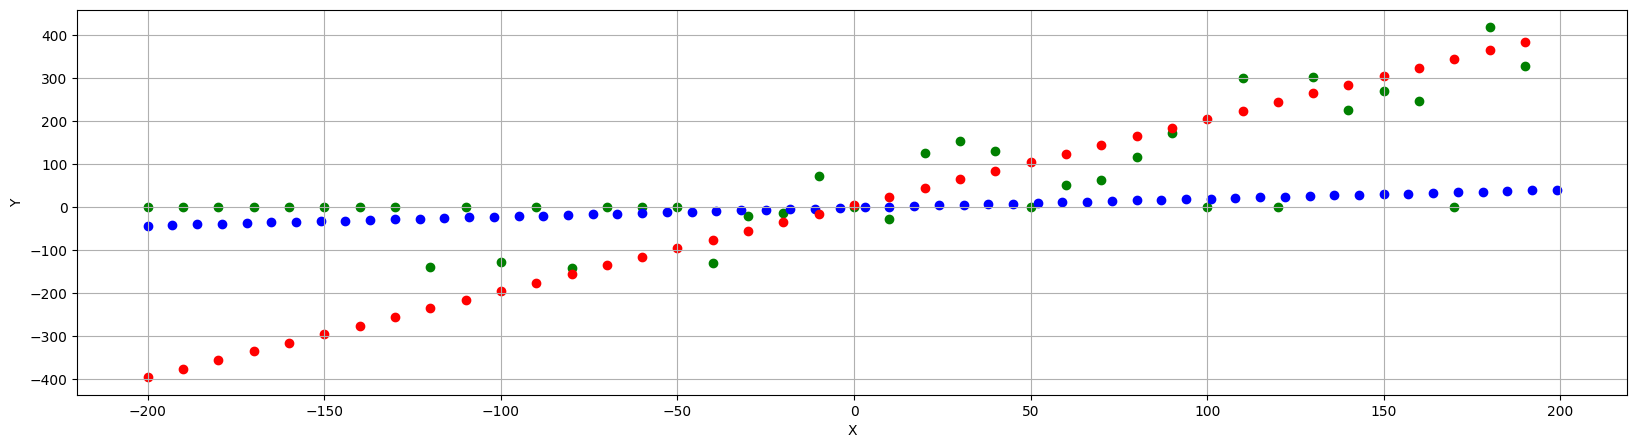

In [7]:
plot_data(X_train,y_train,x,y,X_train,y_train_lin)